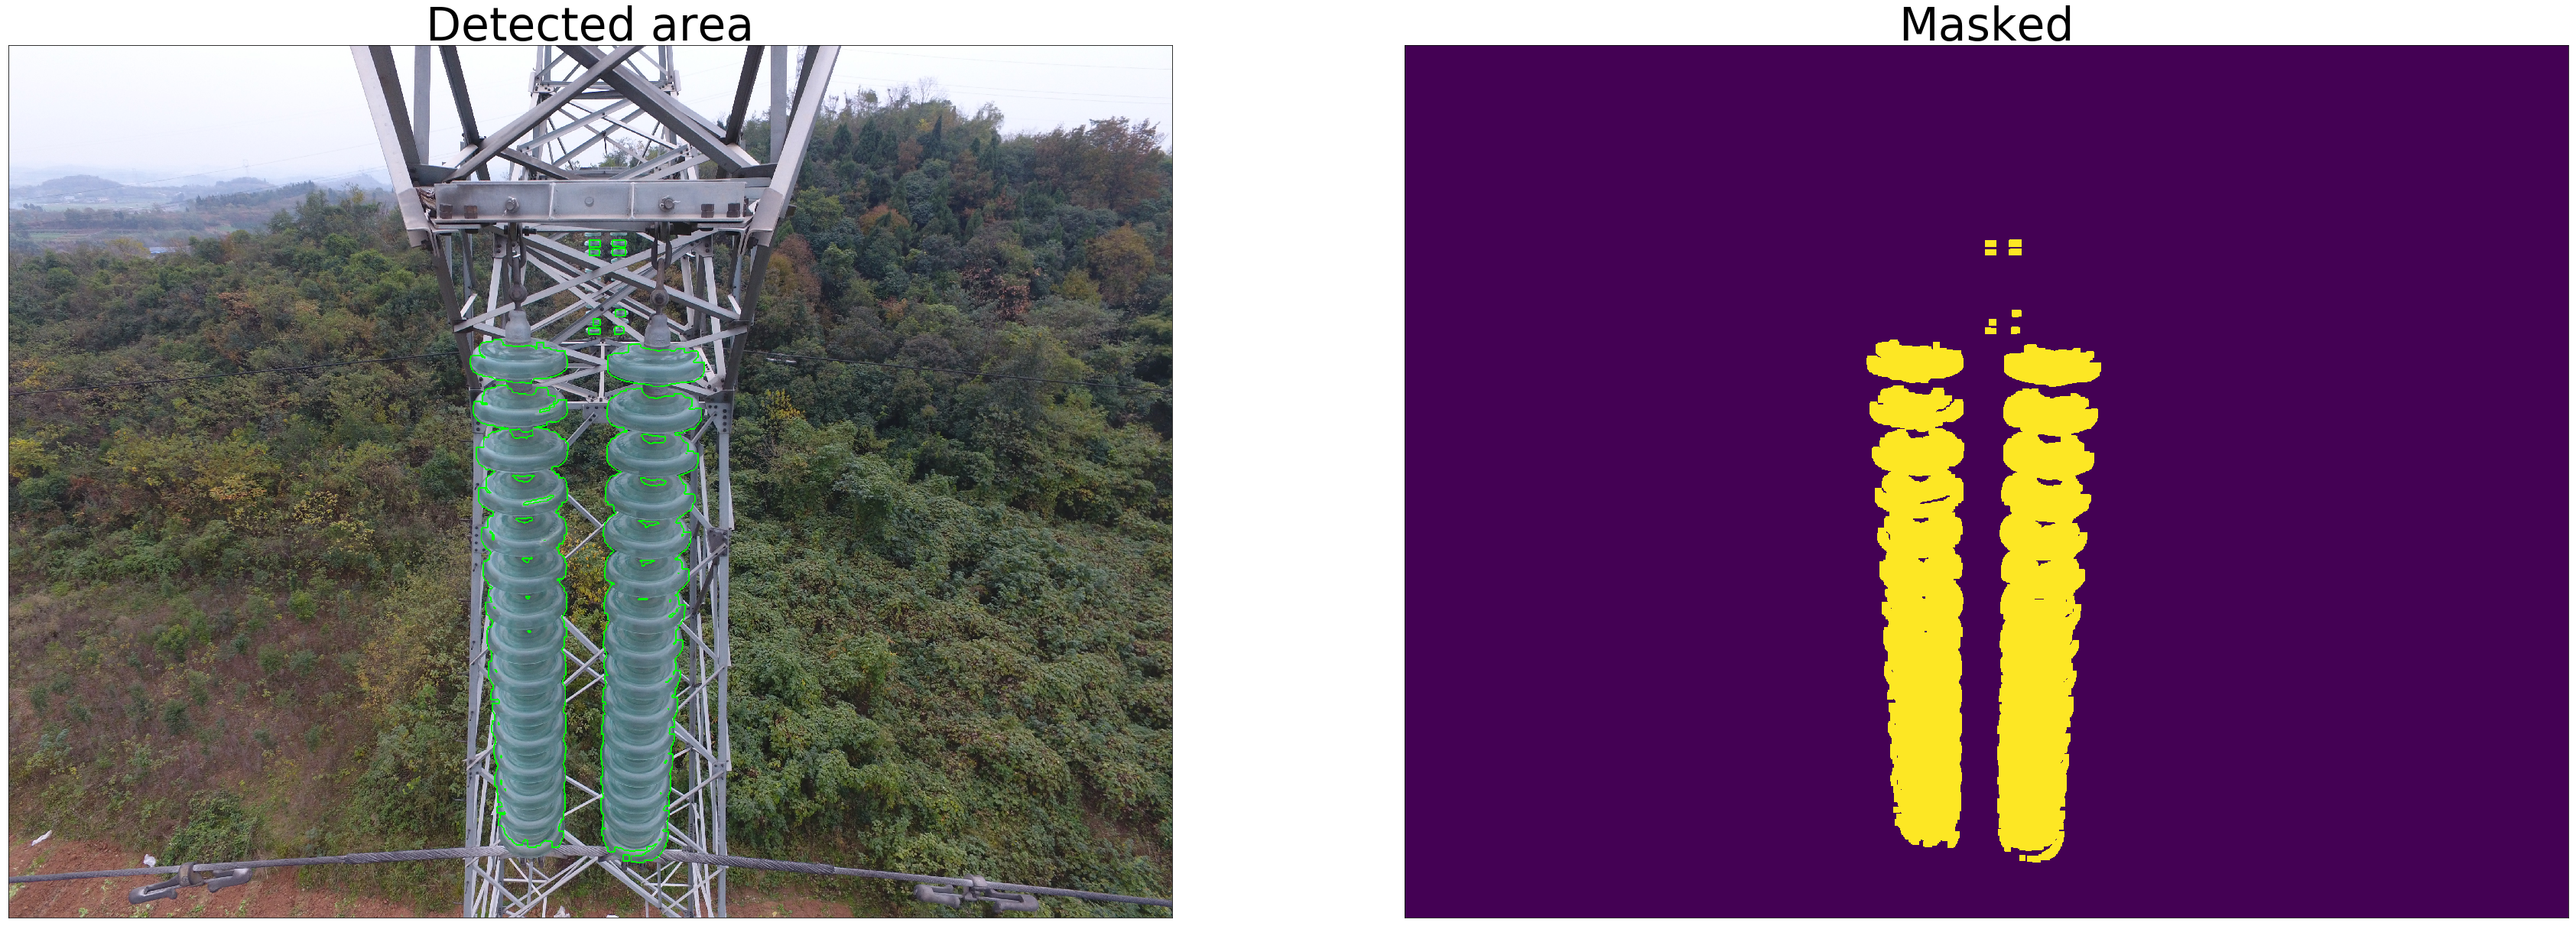

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("images/SampleImages/imgs/4.JPG", 1 )

orig = img.copy()

#cv2.namedWindow('img', cv2.WINDOW_NORMAL)
#cv2.namedWindow('orig', cv2.WINDOW_NORMAL)
#img = cv2.GaussianBlur(img, (7, 7), 0)

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  
lower_red = np.array([88, 42, 96]) 
upper_red = np.array([104, 109, 203]) 
mask = cv2.inRange(hsv, lower_red, upper_red)


kernel = np.ones((13, 13),np.uint8)
erosion = cv2.erode(mask,kernel,iterations = 1)

kernel2 = np.ones((21, 21),np.uint8)
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

(contimg, cont,_) = cv2.findContours(dilation, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(orig,cont,-1,(0,255,0),3)


#https://stackoverflow.com/questions/15072736/extracting-a-region-from-an-image-using-slicing-in-python-opencv/15074748#15074748
orig=cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)
#dilation=cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB)
titles = ['Detected area','Masked']
images = [orig, dilation]

plt.figure(figsize=(60,30)) 

for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i], fontsize=60)
    plt.xticks([]),plt.yticks([])

plt.show()


#cv2.imshow('img', dilation)
#cv2.imshow('orig', orig)
#cv2.waitKey(0)
#cv2.destroyAllWindows()